In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('googleplaystore.csv')

In [3]:
df.shape

(10841, 13)

In [4]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [5]:
df.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [7]:
df['Reviews'] = pd.to_numeric(df['Reviews'],errors='coerce')

In [8]:
df['Installs'] = df['Installs'].apply(lambda x : x.strip('+').replace(',', ''))
i = df[df['Category'] == '1.9'].index
df.loc[i]
df = df.drop(i)

df['Installs'] = df['Installs'].astype(int)

In [9]:
df['Size'] = df['Size'].apply(lambda x: str(x).replace('M',''))
df['Size'] = df['Size'].apply(lambda x: str(x).replace('k',''))
df['Size'] = df['Size'].apply(lambda x: str(x).replace('+',''))

df['Size'] = pd.to_numeric(df['Size'],errors='coerce')

In [10]:
df['Price']=df['Price'].str.replace('$','').astype('float')

C:\Users\sathish\AppData\Local\Temp/ipykernel_7040/3617363508.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Price']=df['Price'].str.replace('$','').astype('float')


In [11]:
df.describe()

,Rating,Reviews,Size,Installs,Price
count,9366.000000,1.084000e+04,9145.000000,1.084000e+04,10840.000000
mean,4.191757,4.441529e+05,37.035440,1.546434e+07,1.027368
std,0.515219,2.927761e+06,98.873769,8.502936e+07,15.949703
min,1.000000,0.000000e+00,1.000000,0.000000e+00,0.000000
25%,4.000000,3.800000e+01,5.600000,1.000000e+03,0.000000
50%,4.300000,2.094000e+03,15.000000,1.000000e+05,0.000000
75%,4.500000,5.477550e+04,34.000000,5.000000e+06,0.000000
max,5.000000,7.815831e+07,1020.000000,1.000000e+09,400.000000


In [12]:
df.groupby(["Category"]).Rating.mean()

Category
ART_AND_DESIGN         4.358065
AUTO_AND_VEHICLES      4.190411
BEAUTY                 4.278571
BOOKS_AND_REFERENCE    4.346067
BUSINESS               4.121452
COMICS                 4.155172
COMMUNICATION          4.158537
DATING                 3.970769
EDUCATION              4.389032
ENTERTAINMENT          4.126174
EVENTS                 4.435556
FAMILY                 4.192272
FINANCE                4.131889
FOOD_AND_DRINK         4.166972
GAME                   4.286326
HEALTH_AND_FITNESS     4.277104
HOUSE_AND_HOME         4.197368
LIBRARIES_AND_DEMO     4.178462
LIFESTYLE              4.094904
MAPS_AND_NAVIGATION    4.051613
MEDICAL                4.189143
NEWS_AND_MAGAZINES     4.132189
PARENTING              4.300000
PERSONALIZATION        4.335987
PHOTOGRAPHY            4.192114
PRODUCTIVITY           4.211396
SHOPPING               4.259664
SOCIAL                 4.255598
SPORTS                 4.223511
TOOLS                  4.047411
TRAVEL_AND_LOCAL       4.109292

In [13]:
dfa = df.groupby(['Category','App'])['Installs'].sum().reset_index()

dfa = dfa.sort_values('Installs', ascending = False)

dftop = dfa[dfa.Installs >= 1000000000]

dftop

,Category,App,Installs
4852,GAME,Subway Surfers,6.000000e+09
7507,PRODUCTIVITY,Google Drive,4.000000e+09
7999,SOCIAL,Instagram,4.000000e+09
7160,PHOTOGRAPHY,Google Photos,4.000000e+09
1065,COMMUNICATION,Hangouts,4.000000e+09
6468,NEWS_AND_MAGAZINES,Google News,4.000000e+09
9426,TRAVEL_AND_LOCAL,Maps - Navigate & Explore,3.000000e+09
1146,COMMUNICATION,Skype - free IM & video calls,3.000000e+09
4245,GAME,Candy Crush Saga,3.000000e+09
1056,COMMUNICATION,Gmail,3.000000e+09


<AxesSubplot:xlabel='Type', ylabel='Rating'>

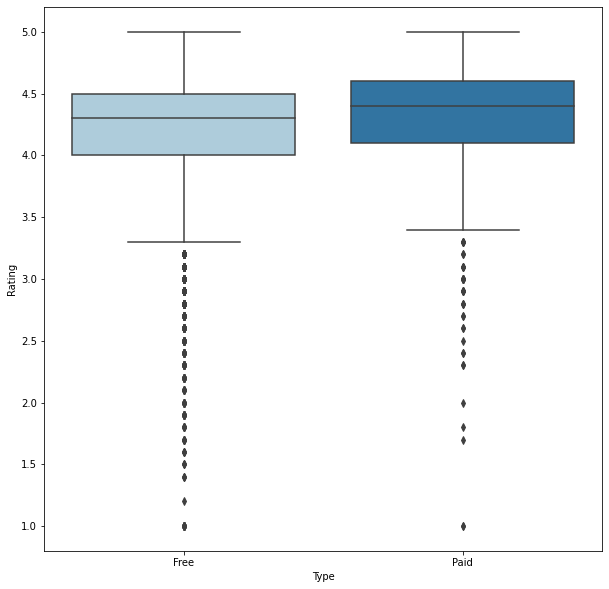

In [14]:
plt.figure(figsize=(10,10))
sns.boxplot(x='Type', y='Rating', data= df, palette='Paired')

In [15]:
df['Type'].value_counts()

Free    10039
Paid      800
Name: Type, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'ART_AND_DESIGN'),
  Text(1, 0, 'AUTO_AND_VEHICLES'),
  Text(2, 0, 'BEAUTY'),
  Text(3, 0, 'BOOKS_AND_REFERENCE'),
  Text(4, 0, 'BUSINESS'),
  Text(5, 0, 'COMICS'),
  Text(6, 0, 'COMMUNICATION'),
  Text(7, 0, 'DATING'),
  Text(8, 0, 'EDUCATION'),
  Text(9, 0, 'ENTERTAINMENT'),
  Text(10, 0, 'EVENTS'),
  Text(11, 0, 'FINANCE'),
  Text(12, 0, 'FOOD_AND_DRINK'),
  Text(13, 0, 'HEALTH_AND_FITNESS'),
  Text(14, 0, 'HOUSE_AND_HOME'),
  Text(15, 0, 'LIBRARIES_AND_DEMO'),
  Text(16, 0, 'LIFESTYLE'),
  Text(17, 0, 'GAME'),
  Text(18, 0, 'FAMILY'),
  Text(19, 0, 'MEDICAL'),
  Text(20, 0, 'SOCIAL'),
  Text(21, 0, 'SHOPPING'),
  Text(22, 0, 'PHOTOGRAPHY'),
  Text(23, 0, 'SPORTS'),
  Text(24, 0, 'TRAVEL_AND_LOCAL'),
  Text(25, 0, 'TOOLS'),
  Text(26, 0, 'PERSONALIZATION'),
  Text(27, 0, 'PRODUCTIVITY'),
  Text(28, 0, 'PARENTING'),
  Text(

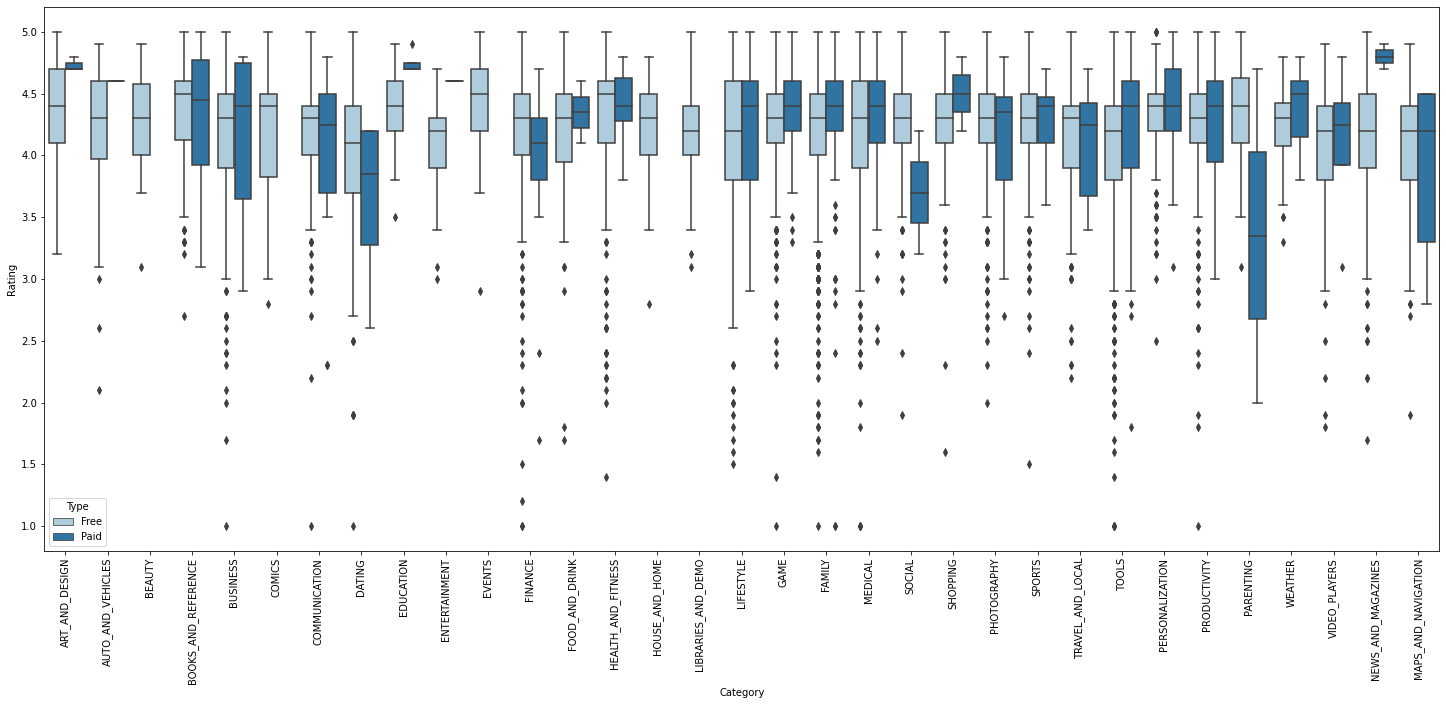

In [16]:
df = df[(df['Rating'] <= 5)]
plt.figure(figsize=(25,10))
sns.boxplot(x='Category', y='Rating', data= df, hue='Type', palette='Paired')
plt.xticks(rotation=90)

<AxesSubplot:xlabel='Rating', ylabel='Count'>

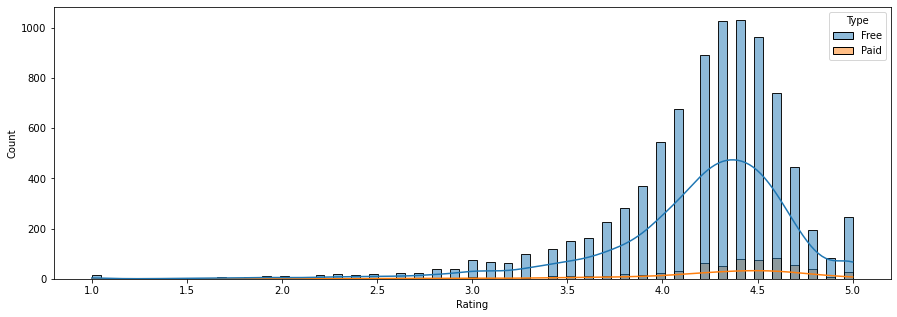

In [17]:
plt.figure(figsize=(15,5))
sns.histplot(x='Rating',hue='Type',data=df, kde=True)

Text(0.5, 0, 'Rating')

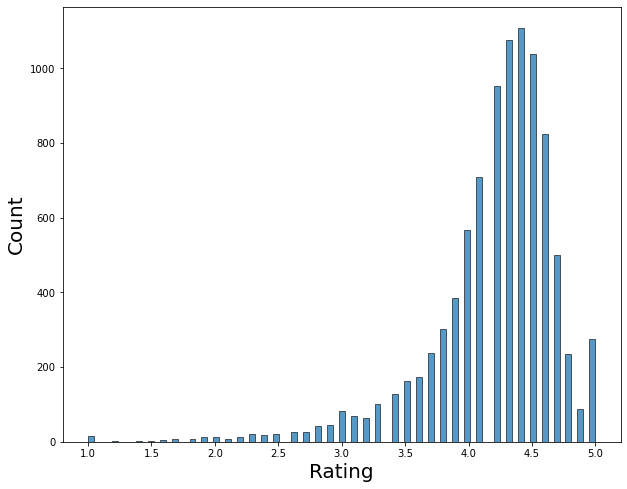

In [18]:
plt.figure(figsize=(10,8))
sns.histplot(x='Rating',data=df)
plt.ylabel('Count', fontsize=20)
plt.xlabel('Rating', fontsize=20)

In [19]:
freeapps = df[(df['Type']=='Free')]
freeapps_avg = freeapps.groupby(['Category'])['Rating'].mean().reset_index()

paidapps = df[(df['Type']=='Paid')]
paidapps_avg = paidapps.groupby(['Category'])['Rating'].mean().reset_index()

df_types_avg =  freeapps_avg.merge(paidapps_avg, left_on='Category', right_on='Category', suffixes=(' free', ' paid'))

df_types_avg['difference'] = df_types_avg['Rating paid']-df_types_avg['Rating free']
df_types_avg

,Category,Rating free,Rating paid,difference
0,ART_AND_DESIGN,4.338983,4.733333,0.394350
1,AUTO_AND_VEHICLES,4.184722,4.600000,0.415278
2,BOOKS_AND_REFERENCE,4.349412,4.275000,-0.074412
3,BUSINESS,4.118493,4.200000,0.081507
4,COMMUNICATION,4.165359,4.063636,-0.101723
5,DATING,3.978010,3.625000,-0.353010
6,EDUCATION,4.379470,4.750000,0.370530
7,ENTERTAINMENT,4.119728,4.600000,0.480272
8,FAMILY,4.181767,4.295062,0.113295
9,FINANCE,4.144516,3.830769,-0.313747


Text(0.5, 1.0, 'Difference of Ratings between Paid and Free Apps Across App Categories')

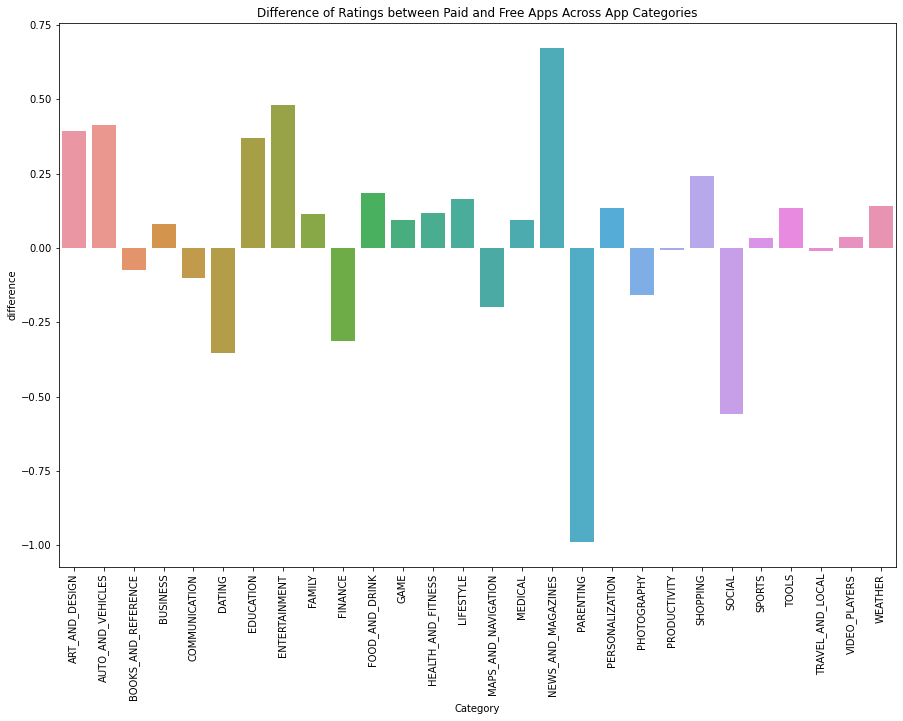

In [20]:
f, ax = plt.subplots(figsize = (15,10))
sns.barplot(x='Category', y='difference', data=df_types_avg)
plt.xticks(rotation=90)
plt.title("Difference of Ratings between Paid and Free Apps Across App Categories")

Text(24.05000000000001, 0.5, 'Rating')

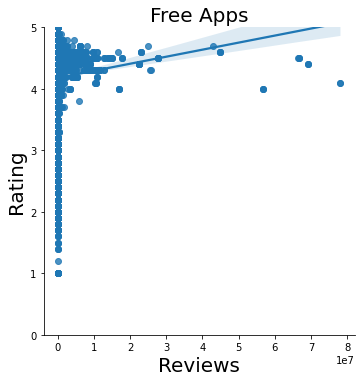

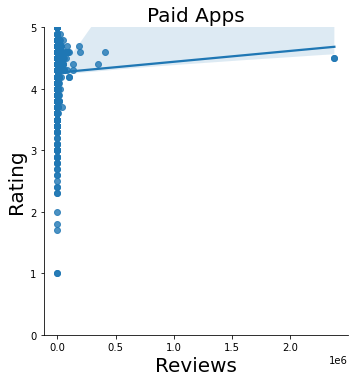

In [21]:
#f, ax = plt.subplots(figsize = (10,10))
#sns.scatterplot(x='Reviews', y='Rating', data=freeapps,size='Installs')

#f, ax = plt.subplots(figsize = (10,10))
#sns.scatterplot(x='Reviews', y='Rating', data=paidapps, size='Installs')

f = sns.lmplot(x='Reviews', y='Rating', data=freeapps)
f.set(ylim=(0, 5))
plt.title("Free Apps", fontsize=20)
plt.xlabel('Reviews', fontsize=20)
plt.ylabel('Rating', fontsize=20)


p = sns.lmplot(x='Reviews', y='Rating', data=paidapps)
p.set(ylim=(0, 5))
plt.title("Paid Apps", fontsize=20)
plt.xlabel('Reviews', fontsize=20)
plt.ylabel('Rating', fontsize=20)

Text(0.5, 20.80000000000002, 'Downloads')

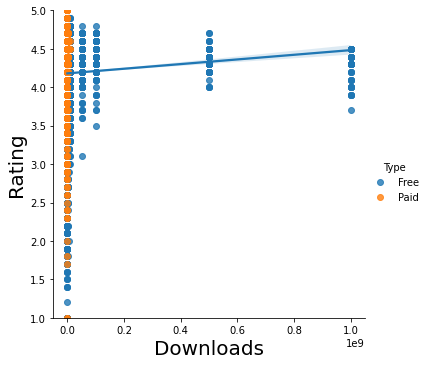

In [22]:
p = sns.lmplot(y='Rating', x='Installs', data=df,hue='Type')
p.set(ylim=(1, 5))
plt.ylabel('Rating', fontsize=20)
plt.xlabel('Downloads', fontsize=20)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 [Text(0, 0, 'BUSINESS'),
  Text(1, 0, 'COMMUNICATION'),
  Text(2, 0, 'DATING'),
  Text(3, 0, 'EDUCATION'),
  Text(4, 0, 'ENTERTAINMENT'),
  Text(5, 0, 'FOOD_AND_DRINK'),
  Text(6, 0, 'HEALTH_AND_FITNESS'),
  Text(7, 0, 'GAME'),
  Text(8, 0, 'FAMILY'),
  Text(9, 0, 'MEDICAL'),
  Text(10, 0, 'PHOTOGRAPHY'),
  Text(11, 0, 'SPORTS'),
  Text(12, 0, 'PERSONALIZATION'),
  Text(13, 0, 'PRODUCTIVITY'),
  Text(14, 0, 'WEATHER'),
  Text(15, 0, 'TOOLS'),
  Text(16, 0, 'TRAVEL_AND_LOCAL'),
  Text(17, 0, 'LIFESTYLE'),
  Text(18, 0, 'AUTO_AND_VEHICLES'),
  Text(19, 0, 'NEWS_AND_MAGAZINES'),
  Text(20, 0, 'SHOPPING'),
  Text(21, 0, 'BOOKS_AND_REFERENCE'),
  Text(22, 0, 'SOCIAL'),
  Text(23, 0, 'ART_AND_DESIGN'),
  Text(24, 0, 'VIDEO_PLAYERS'),
  Text(25, 0, 'FINANCE'),
  Text(26, 0, 'MAPS_AND_NAVIGATION'),
  Text(27, 0, 'PARENTING')])

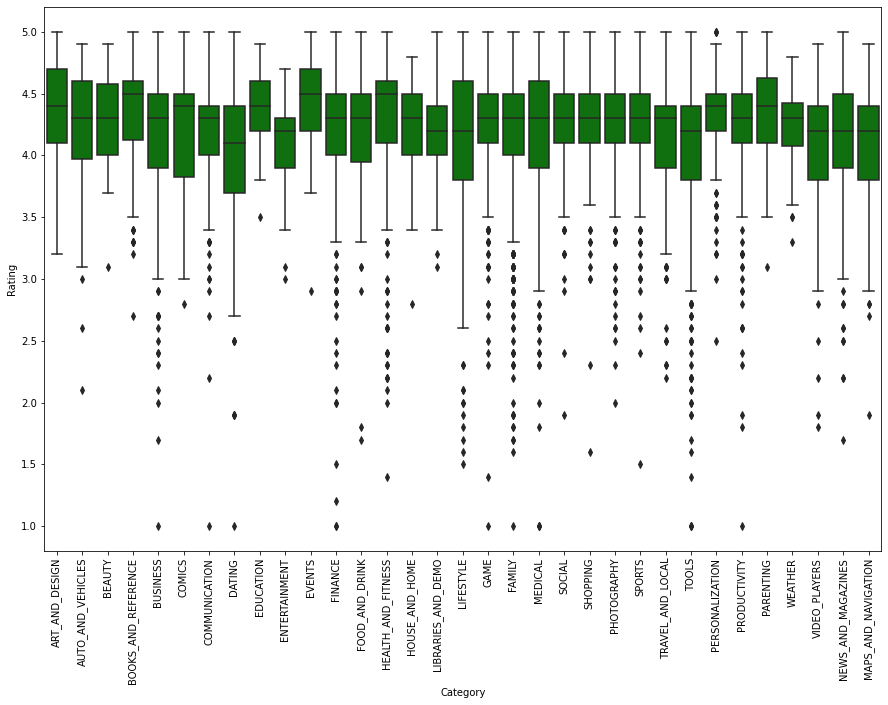

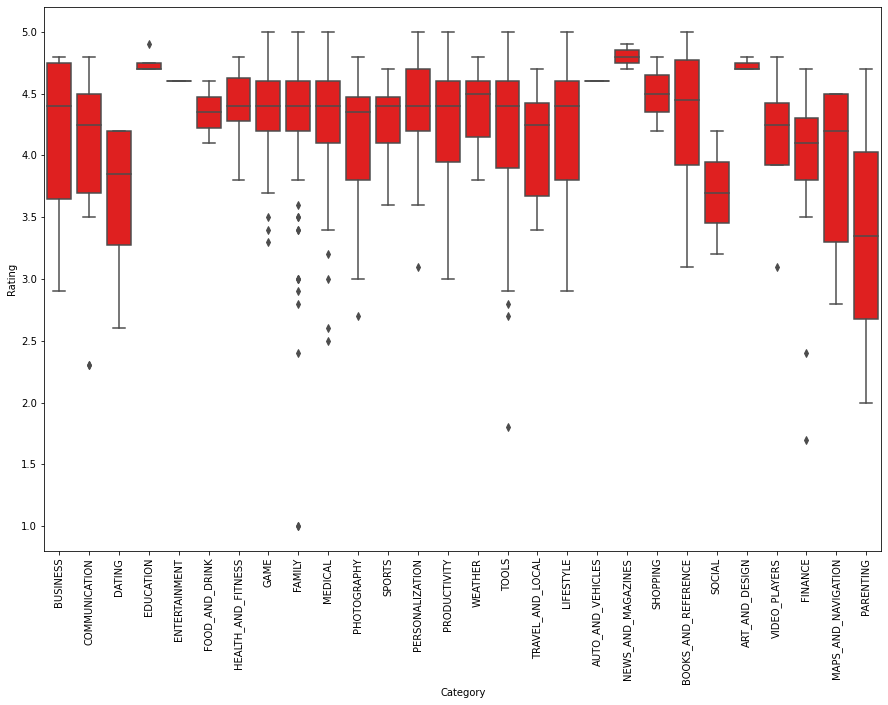

In [23]:
f, ax = plt.subplots(figsize = (15,10))
sns.boxplot(x='Category', y='Rating', data=freeapps, color = "green")
plt.xticks(rotation=90)

f, ax = plt.subplots(figsize = (15,10))
sns.boxplot(x='Category', y='Rating', data=paidapps, color = "red")
plt.xticks(rotation=90)

In [24]:
avg_rating = df.groupby(["Category"]).Rating.mean()
avg_rating

Category
ART_AND_DESIGN         4.358065
AUTO_AND_VEHICLES      4.190411
BEAUTY                 4.278571
BOOKS_AND_REFERENCE    4.346067
BUSINESS               4.121452
COMICS                 4.155172
COMMUNICATION          4.158537
DATING                 3.970769
EDUCATION              4.389032
ENTERTAINMENT          4.126174
EVENTS                 4.435556
FAMILY                 4.192272
FINANCE                4.131889
FOOD_AND_DRINK         4.166972
GAME                   4.286326
HEALTH_AND_FITNESS     4.277104
HOUSE_AND_HOME         4.197368
LIBRARIES_AND_DEMO     4.178462
LIFESTYLE              4.094904
MAPS_AND_NAVIGATION    4.051613
MEDICAL                4.189143
NEWS_AND_MAGAZINES     4.132189
PARENTING              4.300000
PERSONALIZATION        4.335987
PHOTOGRAPHY            4.192114
PRODUCTIVITY           4.211396
SHOPPING               4.259664
SOCIAL                 4.255598
SPORTS                 4.223511
TOOLS                  4.047411
TRAVEL_AND_LOCAL       4.109292

In [25]:
rating = df.groupby(['Category','Installs', 'App'])['Rating'].sum().sort_values(ascending = False).reset_index()

toprating = rating[rating.Rating == 5.0]

toprating['Category'].value_counts()

FAMILY                 67
LIFESTYLE              29
MEDICAL                22
BUSINESS               18
TOOLS                  17
HEALTH_AND_FITNESS     12
GAME                   12
PERSONALIZATION        10
SOCIAL                  8
PRODUCTIVITY            8
FINANCE                 8
NEWS_AND_MAGAZINES      7
DATING                  7
PHOTOGRAPHY             6
SHOPPING                6
BOOKS_AND_REFERENCE     6
EVENTS                  6
COMMUNICATION           5
SPORTS                  4
TRAVEL_AND_LOCAL        3
COMICS                  2
FOOD_AND_DRINK          2
LIBRARIES_AND_DEMO      2
PARENTING               1
ART_AND_DESIGN          1
Name: Category, dtype: int64

In [26]:
installs = df.groupby(['Category'])['Installs'].sum()
installs

Category
ART_AND_DESIGN         1.242331e+08
AUTO_AND_VEHICLES      5.312980e+07
BEAUTY                 2.691620e+07
BOOKS_AND_REFERENCE    1.921292e+09
BUSINESS               1.001768e+09
COMICS                 5.603610e+07
COMMUNICATION          3.264724e+10
DATING                 2.642951e+08
EDUCATION              8.713520e+08
ENTERTAINMENT          2.869160e+09
EVENTS                 1.594941e+07
FAMILY                 1.025770e+10
FINANCE                8.766124e+08
FOOD_AND_DRINK         2.737778e+08
GAME                   3.508586e+10
HEALTH_AND_FITNESS     1.583056e+09
HOUSE_AND_HOME         1.685820e+08
LIBRARIES_AND_DEMO     6.208300e+07
LIFESTYLE              5.375611e+08
MAPS_AND_NAVIGATION    7.242676e+08
MEDICAL                5.320558e+07
NEWS_AND_MAGAZINES     7.496211e+09
PARENTING              3.111611e+07
PERSONALIZATION        2.325353e+09
PHOTOGRAPHY            1.008824e+10
PRODUCTIVITY           1.417607e+10
SHOPPING               3.247832e+09
SOCIAL             

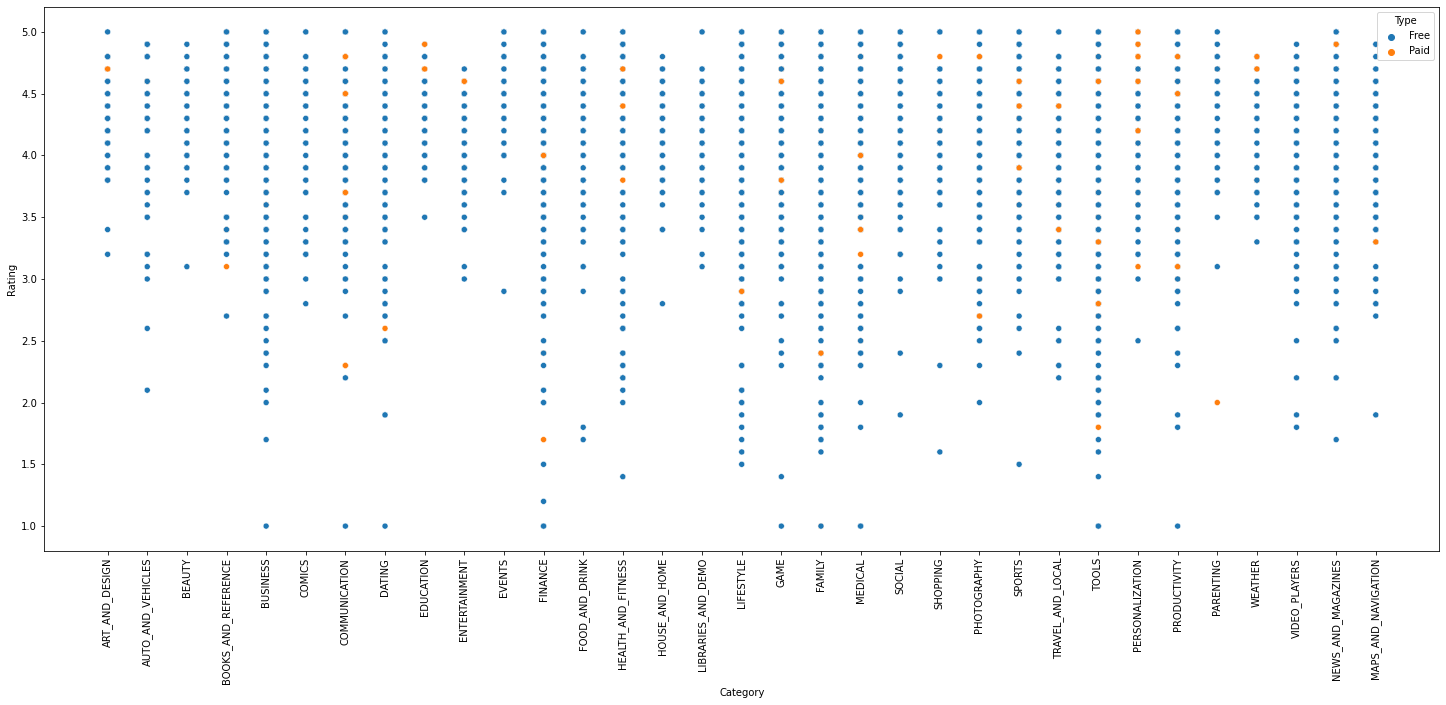

In [27]:
fig, ax = plt.subplots(figsize =(25,10))
ax = sns.scatterplot(x = "Category", y = "Rating", hue = "Type", data = df)
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='Price', ylabel='Rating'>

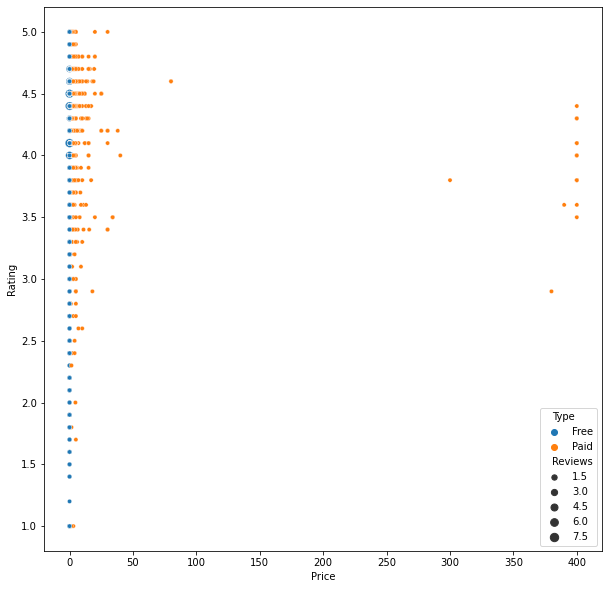

In [28]:
f, ax = plt.subplots(figsize = (10,10))
sns.scatterplot(x='Price', y='Rating', data=df, size='Reviews', hue='Type')

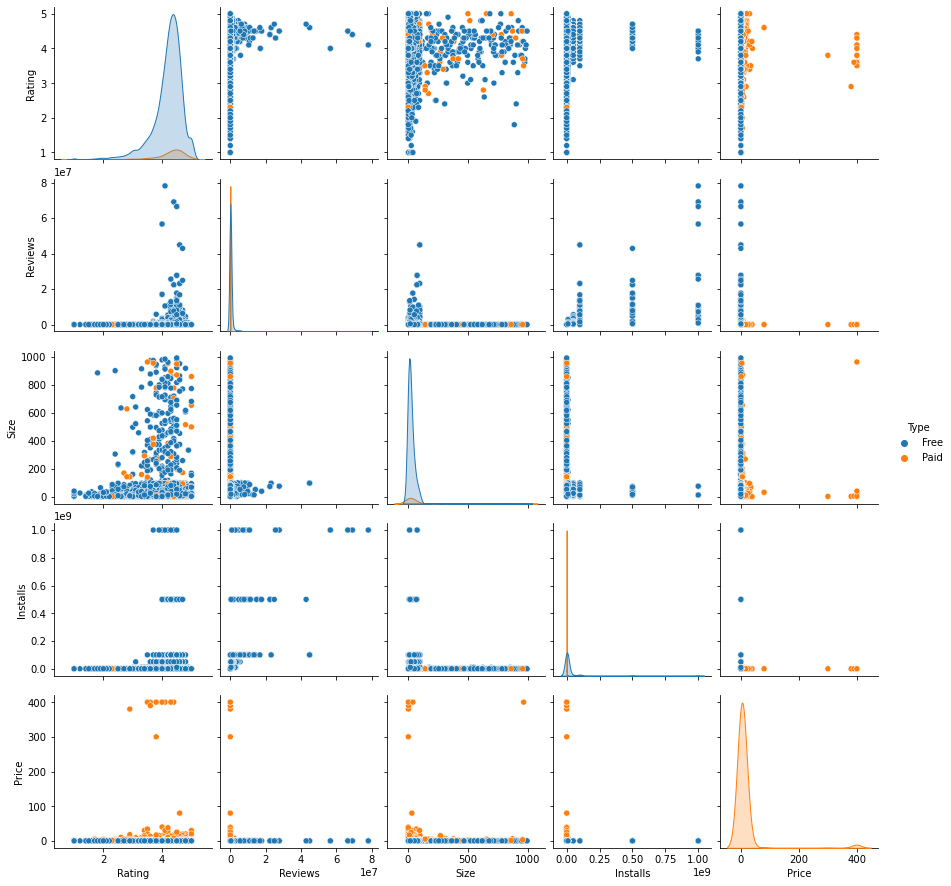

In [29]:
sns.pairplot(df, hue='Type')
plt.show()

[Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, '')]

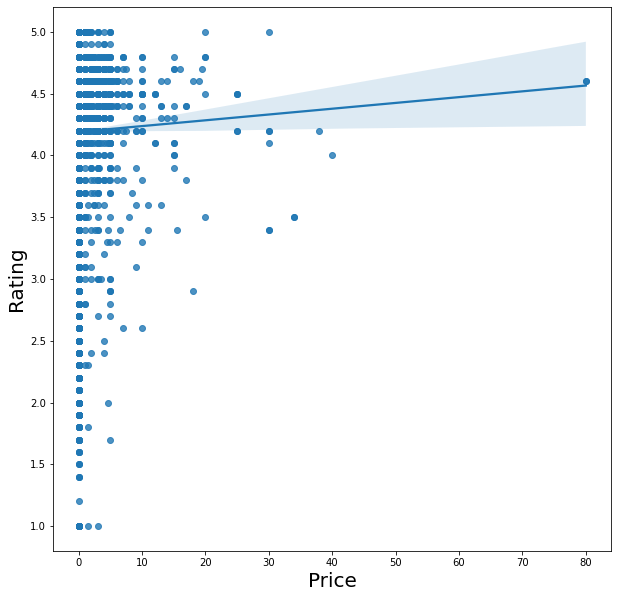

In [30]:
df2 = df[(df['Price'] <=200)]
f, ax = plt.subplots(figsize = (10,10))
sns.regplot(x='Price', y='Rating', data=df2)
ax.set_xlabel('Price', fontsize=20)
ax.set_ylabel('Rating', fontsize=20)
ax.get_xticklabels()

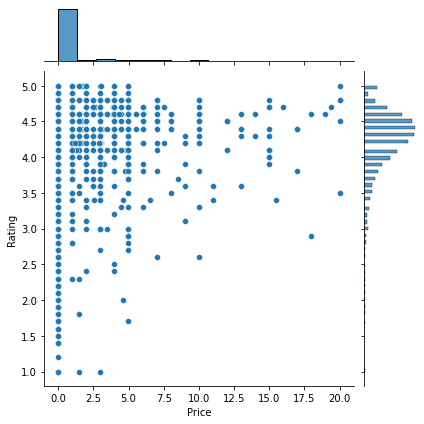

In [31]:
df3 = df[(df['Price'] <=20)]
sns.jointplot(x='Price', y='Rating', data=df3)

<AxesSubplot:>

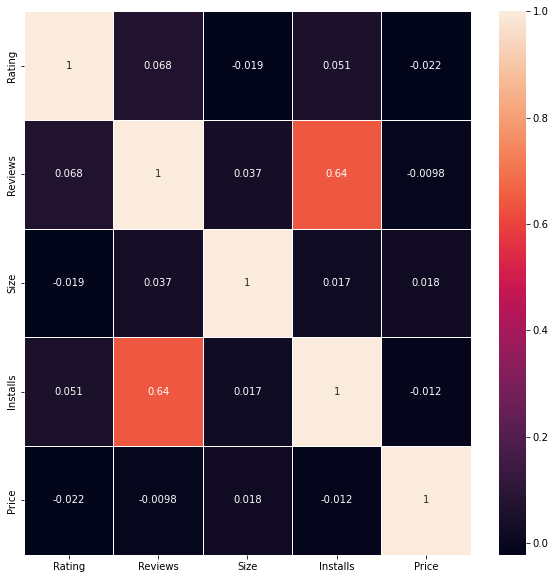

In [33]:
corr = df.corr()
f, ax = plt.subplots(figsize = (10,10))
sns.heatmap(corr, annot = True , linewidths = .5, ax = ax)

In [ ]:
corr = freeapps.corr()
f, ax = plt.subplots(figsize = (10,10))
sns.heatmap(corr, annot = True , linewidths = .5, ax = ax)

In [ ]:
corr = paidapps.corr()
f, ax = plt.subplots(figsize = (10,10))
sns.heatmap(corr, annot = True , linewidths = .5, ax = ax)